# **Import Libraries and modules**

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


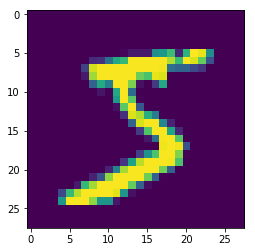

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Last notebook gave me the val Accuracy of 99.49 in 25 epochs with change in batch size ,with a paramter constraint  <15 K i.e., 13.2K ,Hence I can use the same architecture here and play around with the learning rate scheduler

###Increments 

            1)Trying to train on only 128 batch size
            2) Trying to train with a learning rate scheduler
            

In [0]:
def ConvBnDropout(model,size,dout=0.2,K=(3,3)):
  
  model.add(Convolution2D(size, kernel_size=K, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dout))
  return model  
  
  
  

In [0]:
from keras.layers import *

In [11]:

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,24)

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model=ConvBnDropout(model,10,0,K=(1,1))

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,16)
model=ConvBnDropout(model,10)
# model=ConvBnDropout(model,16)


# model=ConvBnDropout(model,10,0,K=(1,1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 24)        96        
__________

Adding checkpoints 

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# callbacks_list = [checkpoint]

In [16]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 161us/step - loss: 0.2596 - acc: 0.9155 - val_loss: 0.0927 - val_acc: 0.9693

Epoch 00001: val_acc improved from -inf to 0.96930, saving model to Best_weights.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 114us/step - loss: 0.0728 - acc: 0.9768 - val_loss: 0.0715 - val_acc: 0.9774

Epoch 00002: val_acc improved from 0.96930 to 0.97740, saving model to Best_weights.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 114us/step - loss: 0.0577 - acc: 0.9823 - val_loss: 0.0338 - val_acc: 0.9897

Epoch 00003: val_acc improved from 0.97740 to 0.98970, saving model to Best_weights.hdf5
Ep

## from the above cell's output we find that validation loss is lesser than training loss and vice vera with the accuracy ,which means if I train this network for a longer period it can still perform better.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)


[0.020700958139137946, 0.994]


In [0]:
from keras.callbacks import *

In [19]:
import keras
model1=keras.models.load_model('Best_weights.hdf5')
print(model1.evaluate(X_test, Y_test, verbose=0))

[0.020463143050370853, 0.9944]


In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


In [25]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint,reduce_lr])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0245 - acc: 0.9918 - val_loss: 0.0197 - val_acc: 0.9938

Epoch 00001: val_acc did not improve from 0.99440
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0190 - val_acc: 0.9941

Epoch 00002: val_acc did not improve from 0.99440
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0256 - acc: 0.9915 - val_loss: 0.0195 - val_acc: 0.9943

Epoch 00003: val_acc did not improve from 0.99440
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0211 - val_acc: 0.9937

Epoch 00004: val_acc did not improve from 0.99440
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0232 - acc: 0.9926 - val_loss: 0.0189 - val_acc: 0.9938

Epoch 00005: val_acc did not improve from 0.99440
Epoch

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.017955765196610445, 0.9947]


In [0]:
y_pred = model.predict(X_test)

In [28]:
print(y_pred[:9])
print(y_test[:9])

[[8.79316325e-12 1.04744789e-10 1.65146730e-09 5.20119336e-10
  6.25320212e-11 6.02012953e-11 2.54179205e-14 9.99999881e-01
  3.68794838e-12 1.69203261e-07]
 [1.13337160e-06 1.47746948e-06 9.99977827e-01 2.52758365e-08
  4.80111453e-08 2.86509943e-12 1.94981440e-05 8.47338733e-09
  5.61663516e-09 1.46831089e-10]
 [1.08409095e-08 9.99994516e-01 1.91474729e-08 2.57039301e-09
  1.66261157e-06 4.16888426e-08 6.44245262e-08 3.74940851e-06
  2.39959136e-10 4.48997994e-08]
 [9.99989629e-01 8.24482704e-11 5.77285633e-08 2.07872453e-09
  1.05215325e-09 1.06196847e-08 9.54338066e-06 4.32972241e-10
  5.51479786e-07 1.81006399e-07]
 [2.34615688e-10 2.18588370e-09 1.65863423e-09 3.11324642e-12
  9.99989033e-01 2.91602276e-09 2.87264901e-09 9.53177270e-09
  5.96538907e-09 1.09947650e-05]
 [9.42112166e-09 9.99956846e-01 3.59610866e-08 1.41178147e-09
  2.22757444e-06 1.10615881e-08 7.28197165e-08 4.07490043e-05
  2.74659018e-10 1.39706742e-07]
 [2.73910864e-12 1.64336438e-08 1.42305584e-10 2.63670878e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_24'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()